In [2]:
# This code is to generate descriptive relaitons between important policy score/outcomes and visualize such relations

In [164]:
import pandas as pd
import numpy as np

In [165]:
# 1. Read the data and assign weight to each row

policy = pd.read_excel("PolicyData.xlsx", index_col=0)
policy['score'] = policy['res_all'] * policy['mag_all']
policy = policy[policy['score'] < 5]

# 2. Write the functions that will be used repeatedly
    
def subset(data, col, v1, v2 = None, v3 = None, v4 = None, v5 = None, v6 = None):
    return data.loc[(data[col] == v1) | (data[col] == v2) | (data[col] == v3) | (data[col] == v4) | (data[col] == v5), :]


def ts(subset, col, name):
    return pd.DataFrame(subset[col].groupby(level=0).sum()).rename(columns={col:name})


def avg(subset, col, name):
    return pd.DataFrame(subset[col].groupby(level=0).mean()).rename(columns={col:name})


def count(subset, col, name):
    return pd.DataFrame(subset[col].groupby(level=0).count()).rename(columns={col:name})

# 2.1 Disaggregate policy scores by policy areas

policy_sel = subset(policy, "pol_area", 1)
policy_int = subset(policy, "pol_area", 2)

ts_all = ts(policy, "score", "ts_all")
as_all = avg(policy, "score", "as_all")

ts_sel = ts(policy_sel, "score", "ts_sel")
as_sel = avg(policy_sel, "score", "as_sel")

ts_int = ts(policy_int, "score", "ts_int")
as_int = avg(policy_int, "score", "as_int")

num_res = count(subset(policy, "res_all", 1), "res_all", "num_res")
num_len = count(subset(policy, "res_all", -1), "res_all", "num_len")

num_sel = count(policy_sel, "res_all", "num_sel")
num_int = count(policy_int, "res_all", "num_int")

num_ls = count(subset(policy_sel, "res_all", -1), "res_all", "num_ls")
num_li = count(subset(policy_int, "res_all", -1), "res_all", "num_li")

dep = pd.concat([ts_all, as_all, ts_sel, as_sel, ts_int, as_int, 
                 num_res, num_len, num_sel, num_int, num_ls, num_li], axis=1).fillna(0).reset_index()

dep["Proname"] = None

proname = {11:'Beijing', 12:"Tianjin", 13:'Hebei', 14:'Shanxi', 15:'Inner Mongolia', 21:'Liaoning', 22:'Jilin',
           23:'Heilongjiang', 31:'Shanghai', 32:'Jiangsu', 33:'Zhejiang', 34:'Anhui', 35:'Fujian', 36:'Jiangxi',
           37:'Shandong', 41:'Henan', 42:'Hubei', 43:'Hunan', 44:'Guangdong', 45:'Guangxi', 46:'Hainan', 50:'Chongqing',
           51:'Sichuan', 52:'Guizhou', 53:'Yunnan', 54:'Xizang', 61:'Shaanxi', 62:'Gansu', 63:'Qinghai', 65:'Xinjiang'}

dep["Proname"] = dep["Procode"].apply(lambda row: proname[row])

<IPython.core.display.Javascript object>


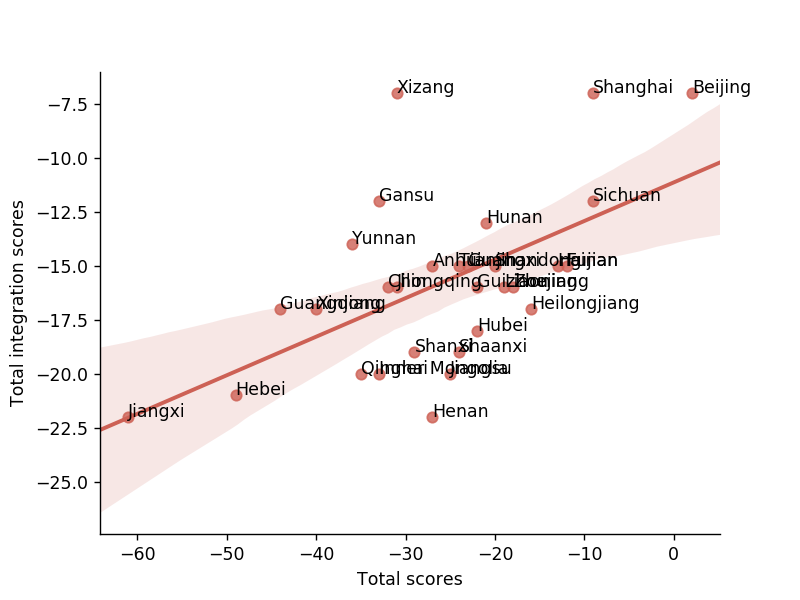

In [48]:
# 2.2 Graphs

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn

var1 = ["num_res", "num_sel", "num_ls", "ts_sel", "as_sel", "ts_all"]
var2 = ["num_len", "num_int", "num_li", "ts_int", "as_int", "as_all"]

cols = ["#9B59B6", "#922B21", "#145A32", "#CD6155", "#5499C7"]

xlab = ["Number of more restrictive policies", "Number of selection policcies", "Number of more lenient selection policies",
       "Total selection scores", "Average selection scores", "Total scores"]

ylab = ["Number of more lenient policies", "Number of integration policies", "Number of more lenient integration policies",
       "Total integration scores", "Average integration scores", "Average scores"]


def plot(v1, v2, color, xlab, ylab):
    plt.figure()
    seaborn.regplot(dep[v1], dep[v2], color=color)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    #plt.xticks([0,1,2,3,4]) Use the system-automatic version
    
    for i, proname in enumerate(dep["Proname"]):
        plt.gca().annotate(proname, (dep[v1].iat[i],dep[v2].iat[i]))

    for spine in ["top", "right"]:
        plt.gca().spines[spine].set_visible(False)
        
#plot(var1[0], var2[0], cols[0], xlab[0], ylab[0])
#plot(var1[5], var1[3], cols[4], xlab[5], xlab[3])
plot(var1[5], var2[3], cols[3], xlab[5], ylab[3])

<IPython.core.display.Javascript object>


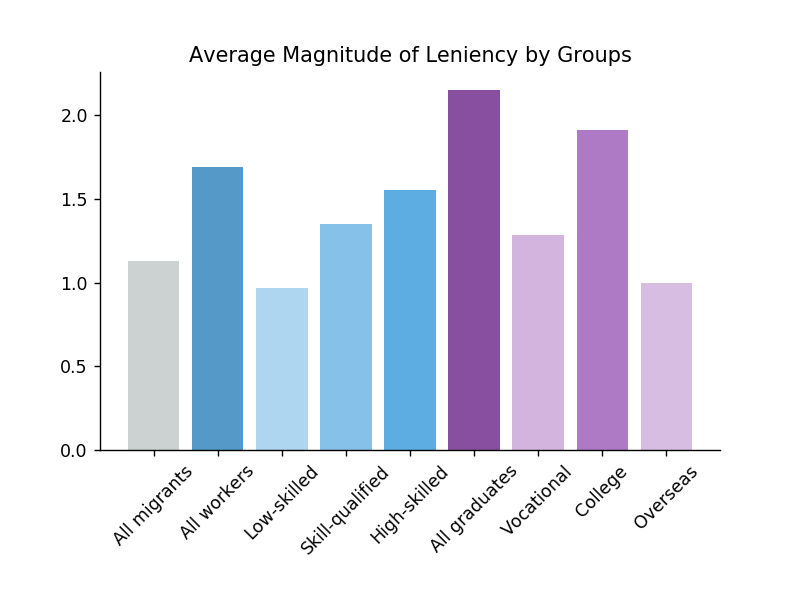

In [163]:
# 3 Disaggregated by migrant groups

def bar(lab, height, colors):
    plt.figure()
    plt.bar(x = lab, height = height, color=colors, align='center')
    plt.title("Average Magnitude of Leniency by Groups")
    
    for i in plt.gca().xaxis.get_ticklabels():
        i.set_rotation(45)
        plt.subplots_adjust(bottom=0.25)

    for spine in ['top','right']:
        plt.gca().spines[spine].set_visible(False)
        

group_avg = policy.groupby("mig_group")['score'].mean()

w = subset(policy, "mig_group", 20, 21, 22, 23)['score'].mean()
g = subset(policy, "mig_group", 30, 31, 32, 33)['score'].mean()
i = subset(policy, "mig_group", 40, 41, 42)['score'].mean()
f = subset(policy, "mig_group", 50, 51, 52, 53, 54)['score'].mean()
o = subset(policy, "mig_group", 60, 61, 62, 63, 64, 65)['score'].mean()


lab1 = ["All migrants", "Migrant workers", "Migrant students", "Migrant investors", "Migrant families", "Others"]
lab2 = ["All migrants", "All workers", "Low-skilled", "Skill-qualified", "High-skilled", 
        "All graduates", "Vocational", "College", "Overseas"]
lab3 = ["All migrants", "All investors", "Real-estate", "Business", "All families", "Spouse", "Parens", "Children", "Others"]

h1 = [-group_avg[10], -w, -g, -i, -f, -o]
h2 = -group_avg[:9]
h3 = [i for i in -group_avg[9:16]]
h3.append(-o)
h3.insert(0, -a)

col1 = ["#CCD1D1","#85C1E9","#AF7AC5","#CD6155", "#F5B041","#EDBB99"]
col2 = ["#CCD1D1","#5499C7","#AED6F1","#85C1E9","#5DADE2","#884EA0","#D2B4DE","#AF7AC5","#D7BDE2"]     
col3 = ["#CCD1D1","#CD6155","#B03A2E","#E6B0AA","#F1C40F","#F4D03F","#F9E79F","#F8C471","#D4A30D","#EDBB99"]

#bar(lab1, h1, col1)
bar(lab2, h2, col2)
#bar(lab3, h3, col3)